# Enron dataset

## Data analysis

Index
1. Overview
2. Data wrangling
3. Data visualization
4. Statistical correlation

In [3]:
import sys
import pickle
#sys.path.append("../tools/")
sys.path.append("P:/Nanodegree/ML/ud120-projects/tools/")

from feature_format import featureFormat, targetFeatureSplit

### Load the dictionary containing the dataset
import pandas as pd
#importando as bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import numpy as np

In [4]:
with open("P:/Nanodegree/ML/ud120-projects/tools/final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [5]:
enron_df = pd.DataFrame.from_dict(data_dict, orient='index', dtype=float)

In [6]:
enron_df.fillna(0 , inplace=True)

# 1. Overview

In [7]:
enron_df.dtypes.index

Index([u'salary', u'to_messages', u'deferral_payments', u'total_payments',
       u'exercised_stock_options', u'bonus', u'restricted_stock',
       u'shared_receipt_with_poi', u'restricted_stock_deferred',
       u'total_stock_value', u'expenses', u'loan_advances', u'from_messages',
       u'other', u'from_this_person_to_poi', u'poi', u'director_fees',
       u'deferred_income', u'long_term_incentive', u'email_address',
       u'from_poi_to_this_person'],
      dtype='object')

In [8]:
# Data overview
enron_df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,0.0,2195.0,152.0,65.0,0.0,0.0,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,0.0,0.0,178980.0,182466.0,257817.0,0.0,0.0,0.0,0.0,257817.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BANNANTINE JAMES M,477.0,566.0,0.0,916197.0,4046157.0,0.0,1757552.0,465.0,-560222.0,5243487.0,...,0.0,29.0,864523.0,0.0,0.0,0.0,-5104.0,0.0,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,0.0,0.0,10623258.0,...,0.0,0.0,2660303.0,0.0,0.0,0.0,-1386055.0,1586055.0,NaN,0.0
BAY FRANKLIN R,239671.0,0.0,260455.0,827696.0,0.0,400000.0,145796.0,0.0,-82782.0,63014.0,...,0.0,0.0,69.0,0.0,0.0,0.0,-201641.0,0.0,frank.bay@enron.com,0.0


In [9]:
# Number of rows and columns
enron_df.shape

(146, 21)

In [10]:
# Columns types
enron_df.dtypes

salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
exercised_stock_options      float64
bonus                        float64
restricted_stock             float64
shared_receipt_with_poi      float64
restricted_stock_deferred    float64
total_stock_value            float64
expenses                     float64
loan_advances                float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
poi                          float64
director_fees                float64
deferred_income              float64
long_term_incentive          float64
email_address                 object
from_poi_to_this_person      float64
dtype: object

In [11]:
enron_df.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,1.460000e+02,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,1.460000e+02,146.000000,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,146.000000
mean,3.658114e+05,1221.589041,4.387965e+05,4.350622e+06,4.182736e+06,1.333474e+06,1.749257e+06,692.986301,2.051637e+04,5.846018e+06,7.074827e+04,1.149658e+06,358.602740,5.854318e+05,24.287671,0.123288,1.942249e+04,-3.827622e+05,6.646839e+05,38.226027
std,2.203575e+06,2226.770637,2.741325e+06,2.693448e+07,2.607040e+07,8.094029e+06,1.089995e+07,1072.969492,1.439661e+06,3.624681e+07,4.327163e+05,9.649342e+06,1441.259868,3.682345e+06,79.278206,0.329899,1.190543e+05,2.378250e+06,4.046072e+06,73.901124
min,0.000000e+00,0.000000,-1.025000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,0.000000,-7.576788e+06,-4.409300e+04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-2.799289e+07,0.000000e+00,0.000000
25%,0.000000e+00,0.000000,0.000000e+00,9.394475e+04,0.000000e+00,0.000000e+00,8.115000e+03,0.000000,0.000000e+00,2.288695e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-3.792600e+04,0.000000e+00,0.000000
50%,2.105960e+05,289.000000,0.000000e+00,9.413595e+05,6.082935e+05,3.000000e+05,3.605280e+05,102.500000,0.000000e+00,9.659550e+05,2.018200e+04,0.000000e+00,16.500000,9.595000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.500000
75%,2.708505e+05,1585.750000,9.684500e+03,1.968287e+06,1.714221e+06,8.000000e+05,8.145280e+05,893.500000,0.000000e+00,2.319991e+06,5.374075e+04,0.000000e+00,51.250000,1.506065e+05,13.750000,0.000000,0.000000e+00,0.000000e+00,3.750648e+05,40.750000
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,3.117640e+08,9.734362e+07,1.303223e+08,5521.000000,1.545629e+07,4.345095e+08,5.235198e+06,8.392500e+07,14368.000000,4.266759e+07,609.000000,1.000000,1.398517e+06,0.000000e+00,4.852193e+07,528.000000


# 2. Data wrangling

In [12]:
enron_df.total_payments.sort_values(ascending=False).head()

TOTAL               309886585.0
LAY KENNETH L       103559793.0
FREVERT MARK A       17252530.0
BHATNAGAR SANJAY     15456290.0
LAVORATO JOHN J      10425757.0
Name: total_payments, dtype: float64

Does seen quite right, we have a outlier called TOTAL. This doesn't looks like a person name, in fact is the sum of all values. The second largest value receve was Kenneth Lay, but, as you know this make perfect sense since he was the CEO and chairman of Enron. We gonna delete TOTAL row.

In [13]:
enron_df.drop('TOTAL',axis=0, inplace=True)

By now I alredy know that total_payments and total_stock_value are the sum of other values, so I'll search for emptys columns, cause, there a chance they not agreggate value to result.

In [14]:
enron_df[(enron_df.total_payments == 0) & (enron_df.total_stock_value == 0)]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
CHAN RONNIE,0.0,0.0,0.0,0.0,0.0,0.0,32460.0,0.0,-32460.0,0.0,...,0.0,0.0,0.0,0.0,0.0,98784.0,-98784.0,0.0,NaN,0.0
LOCKHART EUGENE E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
POWERS WILLIAM,0.0,653.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,26.0,0.0,0.0,0.0,17500.0,-17500.0,0.0,ken.powers@enron.com,0.0


First of all "LOCKHART EUGENE E" doesn't have any value assign. I do not need to keep it in dataset.
"CHAN RONNIE" and "POWERS WILLIAM" had stock or income put off to a later time causing a total payments equal a 0. Differently of "POWERS WILLIAM", "CHAN RONNIE" had no message sent or received, his presence on the data set is not justified. For now, POWERS WILLIAM is save, I don't know yet if I'll need with shared_receipt_with_poi. None of them are POI.


In [15]:
# Delete two employees from dataset
enron_df.drop(["LOCKHART EUGENE E", "CHAN RONNIE" ],axis=0, inplace=True)

I am using the enron61702insiderpay.pdf file to check the values, to facilitate the conference, I will organize the columns of the dataset in the same sequence as the file.

In [16]:
print list(enron_df.columns.values)

['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


In [17]:
# Change enron_df columns order
enron_df = enron_df[['salary', 'bonus', 'long_term_incentive', 'deferred_income','deferral_payments',
                     'loan_advances', 'other', 'expenses', 'director_fees','total_payments',    
                     'exercised_stock_options','restricted_stock', 'restricted_stock_deferred', 'total_stock_value',
                     'to_messages','shared_receipt_with_poi', 'from_messages','from_this_person_to_poi', 
                     'poi', 'email_address', 'from_poi_to_this_person']]

In [18]:
# Check sum stock values
dif_values = []
for index, row in enron_df.iterrows():    
    temp_stock = (enron_df.loc[index].restricted_stock + 
                  enron_df.loc[index].restricted_stock_deferred + 
                  enron_df.loc[index].exercised_stock_options)
            
    if temp_stock <> enron_df.loc[index].total_stock_value:
        #dif_values.append([index,  poi_df.loc[index].total_stock_value, temp_stock])
        dif_values.append(enron_df.loc[index].name)      

Let's check if any inconsistencies have been found.

In [19]:
print dif_values

['BELFER ROBERT', 'BHATNAGAR SANJAY']


In [20]:
enron_df.loc[dif_values[0]]

salary                            0
bonus                             0
long_term_incentive               0
deferred_income                   0
deferral_payments           -102500
loan_advances                     0
other                             0
expenses                          0
director_fees                  3285
total_payments               102500
exercised_stock_options        3285
restricted_stock                  0
restricted_stock_deferred     44093
total_stock_value            -44093
to_messages                       0
shared_receipt_with_poi           0
from_messages                     0
from_this_person_to_poi           0
poi                               0
email_address                   NaN
from_poi_to_this_person           0
Name: BELFER ROBERT, dtype: object

When we compare this result with enron61702insiderpay.pdf, It's possible to realize that the exercised_stock_options has a incorrect value recorded. 

In [21]:
enron_df.set_value(dif_values[0], 
                 ['deferred_income','deferral_payments', 'expenses', 'director_fees', 'total_payments',
                  'exercised_stock_options','restricted_stock','restricted_stock_deferred','total_stock_value'], 
                 [-102500,0,3285,102500, 3285,0, 44093,-44093,0])

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,0.0,152.0,13868.0,0.0,4484442.0,...,126027.0,-126027.0,1729541.0,2902.0,1407.0,2195.0,65.0,0.0,phillip.allen@enron.com,47.0
BADUM JAMES P,0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,182466.0,...,0.0,0.0,257817.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BANNANTINE JAMES M,477.0,0.0,0.0,-5104.0,0.0,0.0,864523.0,56301.0,0.0,916197.0,...,1757552.0,-560222.0,5243487.0,566.0,465.0,29.0,0.0,0.0,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,...,3942714.0,0.0,10623258.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BAY FRANKLIN R,239671.0,400000.0,0.0,-201641.0,260455.0,0.0,69.0,129142.0,0.0,827696.0,...,145796.0,-82782.0,63014.0,0.0,0.0,0.0,0.0,0.0,frank.bay@enron.com,0.0
BAZELIDES PHILIP J,80818.0,0.0,93750.0,0.0,684694.0,0.0,874.0,0.0,0.0,860136.0,...,0.0,0.0,1599641.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BECK SALLY W,231330.0,700000.0,0.0,0.0,0.0,0.0,566.0,37172.0,0.0,969068.0,...,126027.0,0.0,126027.0,7315.0,2639.0,4343.0,386.0,0.0,sally.beck@enron.com,144.0
BELDEN TIMOTHY N,213999.0,5249999.0,0.0,-2334434.0,2144013.0,0.0,210698.0,17355.0,0.0,5501630.0,...,157569.0,0.0,1110705.0,7991.0,5521.0,484.0,108.0,1.0,tim.belden@enron.com,228.0
BELFER ROBERT,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,...,44093.0,-44093.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BERBERIAN DAVID,216582.0,0.0,0.0,0.0,0.0,0.0,0.0,11892.0,0.0,228474.0,...,869220.0,0.0,2493616.0,0.0,0.0,0.0,0.0,0.0,david.berberian@enron.com,0.0


In [22]:
enron_df.loc[dif_values[1]]

salary                                                0
bonus                                                 0
long_term_incentive                                   0
deferred_income                                       0
deferral_payments                                     0
loan_advances                                         0
other                                            137864
expenses                                              0
director_fees                                    137864
total_payments                              1.54563e+07
exercised_stock_options                     2.60449e+06
restricted_stock                           -2.60449e+06
restricted_stock_deferred                   1.54563e+07
total_stock_value                                     0
to_messages                                         523
shared_receipt_with_poi                             463
from_messages                                        29
from_this_person_to_poi                         

In [23]:
enron_df.set_value(dif_values[1], 
                 ['other', 'expenses', 'director_fees', 'total_payments',
                  'exercised_stock_options','restricted_stock','restricted_stock_deferred','total_stock_value'],
                  [0,137864, 0, 137864, 15456290, 2604490, -2604490, 15456290])

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,0.0,152.0,13868.0,0.0,4484442.0,...,126027.0,-126027.0,1729541.0,2902.0,1407.0,2195.0,65.0,0.0,phillip.allen@enron.com,47.0
BADUM JAMES P,0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,182466.0,...,0.0,0.0,257817.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BANNANTINE JAMES M,477.0,0.0,0.0,-5104.0,0.0,0.0,864523.0,56301.0,0.0,916197.0,...,1757552.0,-560222.0,5243487.0,566.0,465.0,29.0,0.0,0.0,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,...,3942714.0,0.0,10623258.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BAY FRANKLIN R,239671.0,400000.0,0.0,-201641.0,260455.0,0.0,69.0,129142.0,0.0,827696.0,...,145796.0,-82782.0,63014.0,0.0,0.0,0.0,0.0,0.0,frank.bay@enron.com,0.0
BAZELIDES PHILIP J,80818.0,0.0,93750.0,0.0,684694.0,0.0,874.0,0.0,0.0,860136.0,...,0.0,0.0,1599641.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BECK SALLY W,231330.0,700000.0,0.0,0.0,0.0,0.0,566.0,37172.0,0.0,969068.0,...,126027.0,0.0,126027.0,7315.0,2639.0,4343.0,386.0,0.0,sally.beck@enron.com,144.0
BELDEN TIMOTHY N,213999.0,5249999.0,0.0,-2334434.0,2144013.0,0.0,210698.0,17355.0,0.0,5501630.0,...,157569.0,0.0,1110705.0,7991.0,5521.0,484.0,108.0,1.0,tim.belden@enron.com,228.0
BELFER ROBERT,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,...,44093.0,-44093.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BERBERIAN DAVID,216582.0,0.0,0.0,0.0,0.0,0.0,0.0,11892.0,0.0,228474.0,...,869220.0,0.0,2493616.0,0.0,0.0,0.0,0.0,0.0,david.berberian@enron.com,0.0


In [24]:
#for i  in poi_df.index:
dif_values = []
for index, row in enron_df.iterrows():    
    temp_payments = 0
    temp_payments = sum(enron_df.loc[index][0:9])        
    if temp_payments <> enron_df.loc[index].total_payments:
        dif_values.append([index,  enron_df.loc[index].total_payments, temp_payments])
print dif_values

[]


In [25]:
enron_df[enron_df.email_address == "NaN"]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,email_address,from_poi_to_this_person
BADUM JAMES P,0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,182466.0,...,0.0,0.0,257817.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BAXTER JOHN C,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,...,3942714.0,0.0,10623258.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BAZELIDES PHILIP J,80818.0,0.0,93750.0,0.0,684694.0,0.0,874.0,0.0,0.0,860136.0,...,0.0,0.0,1599641.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BELFER ROBERT,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,...,44093.0,-44093.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
BLAKE JR. NORMAN P,0.0,0.0,0.0,-113784.0,0.0,0.0,0.0,1279.0,113784.0,1279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
CLINE KENNETH W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662086.0,-472568.0,189518.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
CUMBERLAND MICHAEL S,184899.0,325000.0,275000.0,0.0,0.0,0.0,713.0,22344.0,0.0,807956.0,...,207940.0,0.0,207940.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
DUNCAN JOHN H,0.0,0.0,0.0,-25000.0,0.0,0.0,0.0,0.0,102492.0,77492.0,...,0.0,0.0,371750.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
FUGH JOHN L,0.0,0.0,0.0,0.0,50591.0,0.0,0.0,0.0,0.0,50591.0,...,0.0,0.0,176378.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
GAHN ROBERT S,192008.0,509870.0,0.0,-1042.0,73122.0,0.0,76547.0,50080.0,0.0,900585.0,...,235370.0,0.0,318607.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


I was looking for some problems on feature e-mail, but I found a unexpected person in the list. Although "THE TRAVEL AGENCY IN THE PARK" had receve $350.000 in payments 2 days before Enron's banckruptcy and Sharon Lay (sister of Kenneth Lay) owned 50% of the company, this record will not be considered a poi.

In [26]:
enron_df.drop('THE TRAVEL AGENCY IN THE PARK',axis=0, inplace=True)

# 3. Data visualization

As we have already corrected the records before, now no errors were found. 
With the correct records we will plot some variables.

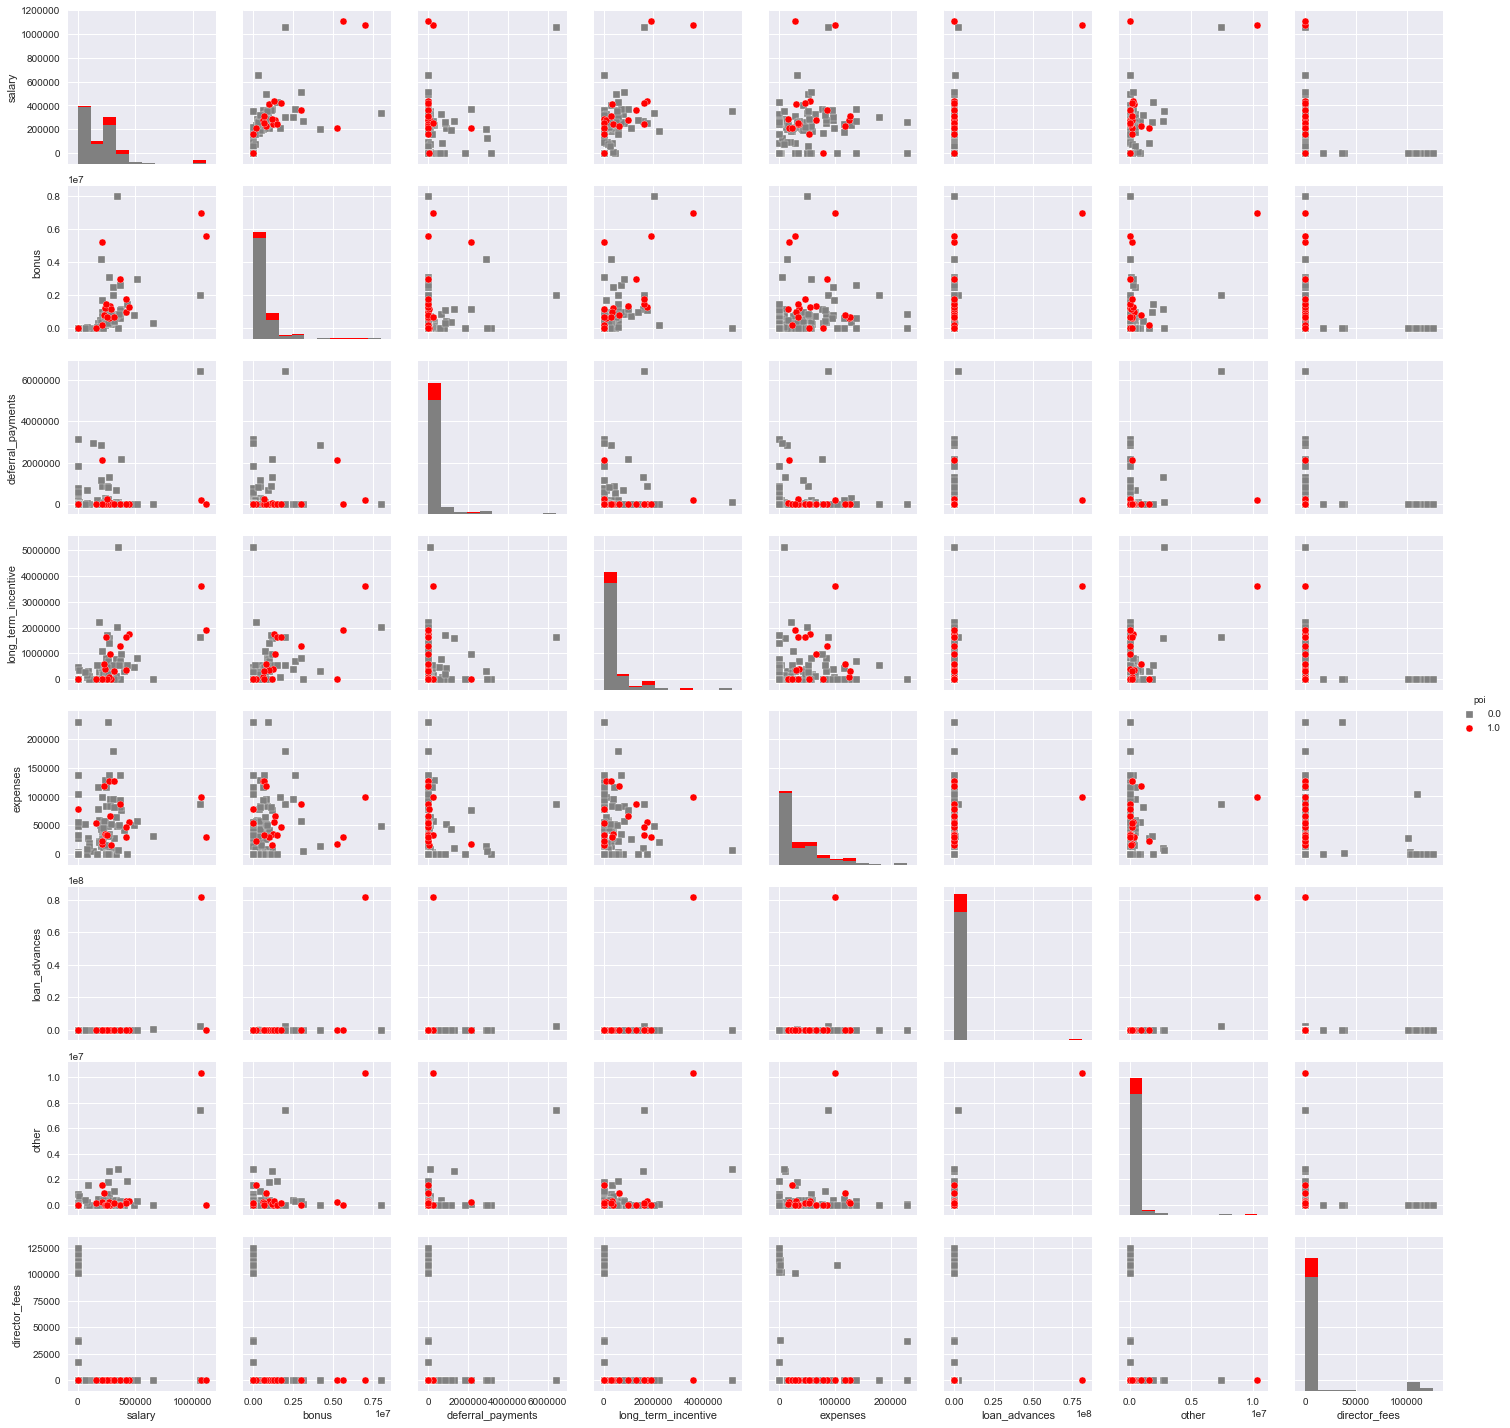

In [27]:
salary = ['salary',
          'bonus', 
          'deferral_payments',           
          'long_term_incentive',
          'expenses', 
          'loan_advances', 
          'other', 
          'director_fees']

sb.pairplot(data=enron_df, vars=salary, hue="poi", markers=['s','o'], palette=['gray','red'])

In the chart we can see how we have some outliers in the financial data usually associated with a POI.

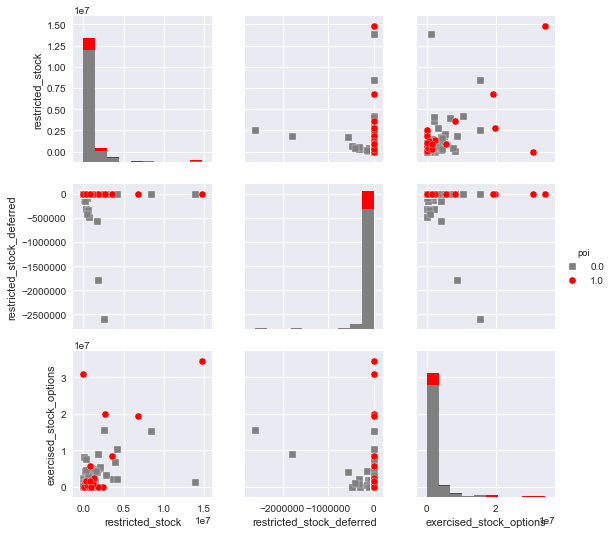

In [28]:
stock = ["restricted_stock", 
         "restricted_stock_deferred",
         "exercised_stock_options"]

sb.pairplot(data=enron_df, vars=stock, hue="poi", markers=['s','o'], palette=['gray','red'])

Total payments and total stock value by POI and not POI:

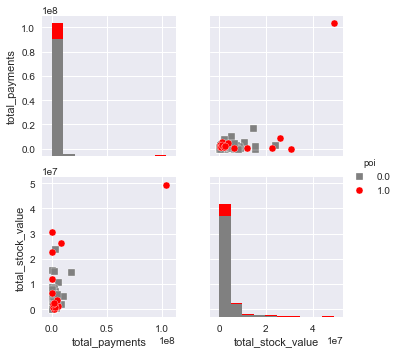

In [29]:
sb.pairplot(data=enron_df, vars=["total_payments", "total_stock_value"], hue="poi", markers=['s','o'], palette=['gray','red'])

# 4. Statistical correlation

Let's see how the variables correlate with each other.

In [30]:
enron_df.corr()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,from_poi_to_this_person
salary,1.000000,0.647775,0.558284,-0.328233,0.240514,0.389115,0.545623,0.328852,-0.296119,0.527077,0.418395,0.523929,0.017200,0.496443,0.392492,0.507932,0.141653,0.204263,0.337557,0.403703
bonus,0.647775,1.000000,0.496066,-0.330186,0.172411,0.432665,0.383044,0.226031,-0.171758,0.570407,0.393905,0.415356,0.049921,0.444001,0.518007,0.663496,0.173099,0.447576,0.357575,0.639678
long_term_incentive,0.558284,0.496066,1.000000,-0.295036,0.117745,0.402171,0.534620,0.080923,-0.153570,0.530105,0.378215,0.334845,0.043820,0.405729,0.189811,0.276782,0.053834,0.155133,0.255434,0.264734
deferred_income,-0.328233,-0.330186,-0.295036,1.000000,-0.542680,-0.024995,-0.265064,-0.030788,0.071196,-0.107702,-0.254483,-0.119872,0.079049,-0.234626,-0.119875,-0.234670,-0.013711,-0.003584,-0.273513,-0.193344
deferral_payments,0.240514,0.172411,0.117745,-0.542680,1.000000,0.014256,0.368423,-0.030386,-0.092463,0.145195,0.107530,0.081826,-0.007112,0.110232,0.122230,0.208086,0.027892,0.000789,-0.041085,0.215175
loan_advances,0.389115,0.432665,0.402171,-0.024995,0.014256,1.000000,0.759393,0.117600,-0.026820,0.972882,0.552024,0.584736,0.016802,0.620756,0.115184,0.137049,-0.019833,-0.010062,0.220070,0.100186
other,0.545623,0.383044,0.534620,-0.265064,0.368423,0.759393,1.000000,0.129606,-0.081216,0.838219,0.530993,0.636348,0.038562,0.621657,0.105098,0.179572,-0.055084,-0.050179,0.169551,0.159493
expenses,0.328852,0.226031,0.080923,-0.030788,-0.030386,0.117600,0.129606,1.000000,-0.127600,0.153163,0.155986,0.179727,-0.154792,0.173073,0.228256,0.273387,0.146490,0.123454,0.190771,0.129817
director_fees,-0.296119,-0.171758,-0.153570,0.071196,-0.092463,-0.026820,-0.081216,-0.127600,1.000000,-0.074258,-0.131333,-0.140510,0.051880,-0.145693,-0.172225,-0.204484,-0.078321,-0.096571,-0.117879,-0.163455
total_payments,0.527077,0.570407,0.530105,-0.107702,0.145195,0.972882,0.838219,0.153163,-0.074258,1.000000,0.581989,0.630040,0.032998,0.659446,0.201784,0.257661,0.011137,0.065327,0.248067,0.222776


As you can see POI has the strongest relationship with the variables salary (0.34), bonus (0.36) , exercised_stock_options (0.37).